In [2]:
#2D transforms 
import matplotlib.pyplot as plt
import numpy as np
import string
import cv2 as cv
# points a, b and, c
a, b, c, d = (0, 0, 1), (0, 1, 1), (1, 1, 1), (1, 0, 1)
# matrix with row vectors of points
P = np.array([a, b, c, d]).T

H = np.identity(3)
#H[0,0] = 2
#H[1,1] = 1.5
#H[0,2] = 1.5
#H[1,2] = 2
#H[0,1] = 0.5
H = np.identity(3)
H[0,0]=-1
#H[1,0] = 0.5
H_homography=[[2,1,2],[2,5,1],[3,2,1]]
t = np.pi/4
H_rotation= [[np.cos(t), np.sin(t), 0.], [-np.sin(t), np.cos(t), 0.], [0., 0., 1.]]
H_euclidead=[[np.cos(t), np.sin(t), 1.5], [-np.sin(t), np.cos(t), 1.5], [0., 0., 1.]]
H_similarity=[[2*np.cos(t),2*np.sin(t), 1.5], [-2*np.sin(t),2*np.cos(t), 1.5], [0., 0., 1.]]
H_affine=[[np.cos(t),0.5* np.sin(t),1.5],[-np.sin(t), np.cos(t),2],[0,0,1]]
print(H)
Pt = np.matmul(H_affine, P)

print(Pt)
P = P/P[-1, :]
P = np.insert(P,4,P[:,0],axis=1) 

x = P[0, :]
y = P[1, :]
Pt = Pt/Pt[-1, :]
Pt = np.insert(Pt,4,Pt[:,0],axis=1)
xt = Pt[0, :]
yt = Pt[1, :]
print(xt)
print(yt)
 

[[-1.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]]
[[1.5        1.85355339 2.56066017 2.20710678]
 [2.         2.70710678 2.         1.29289322]
 [1.         1.         1.         1.        ]]
[1.5        1.85355339 2.56066017 2.20710678 1.5       ]
[2.         2.70710678 2.         1.29289322 2.        ]


Text(0.5, 1.0, 'Affine Transformation')

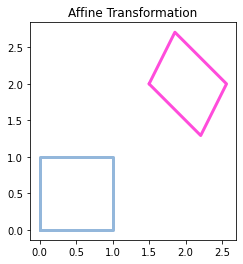

In [3]:
fig, ax = plt.subplots(1,1, sharex=True, sharey=True)
ax.plot(x, y, color='#6699cc', alpha=0.7,
linewidth=3, solid_capstyle='round', zorder=2)
ax.set_aspect('equal')
ax.plot(xt, yt, color='#ff00cc', alpha=0.7,
linewidth=3, solid_capstyle='round', zorder=2)
ax.set_aspect('equal')
ax.set_title("Affine Transformation")

In [4]:
#image warping 
im1 = cv.imread('Downloads/Graf/img1.ppm', cv.IMREAD_ANYCOLOR)
im5=cv.imread('Downloads/Graf/img5.ppm', cv.IMREAD_ANYCOLOR)
with open('Downloads/Graf/H1to5p') as f:
       H = [[float(x) for x in line.split()] for line in f]
H = np.array(H)
print("H inverse=",np.linalg.inv(H))
im5_warped = cv.warpPerspective(im5, np.linalg.inv(H), (1000,1000))
im5_warped[0:im1.shape[0], 0:im1.shape[1]] = im1
cv.namedWindow("Image 1", cv.WINDOW_AUTOSIZE)
cv.imshow("Image 1", im1)
cv.waitKey(0)
cv.namedWindow("Image 5", cv.WINDOW_AUTOSIZE)
cv.imshow("Image 5", im5)
cv.waitKey(0)
cv.namedWindow("Image 5 Warped", cv.WINDOW_AUTOSIZE)
cv.imshow("Image 5 Warped", im5_warped)
cv.waitKey(0)
cv.destroyAllWindows()

H inverse= [[ 1.98849651e+00 -1.12504231e-01 -4.44351164e+02]
 [-4.01372580e-01  8.81609323e-01  1.11683743e+02]
 [-9.93256865e-04  8.75823372e-05  1.22275771e+00]]


In [5]:
im1 = cv.imread('Downloads/Graf/img1.ppm', cv.IMREAD_ANYCOLOR)
im5=cv.imread('Downloads/Graf/img5.ppm', cv.IMREAD_ANYCOLOR)
with open('Downloads/Graf/H1to5p') as f:
       H = [[float(x) for x in line.split()] for line in f]
H = np.array(H)
print("H=",H)
im1_warped = cv.warpPerspective(im1,H, (1000,1000))
im1_warped[0:im5.shape[0], 0:im5.shape[1]] = im5
cv.namedWindow("Image 1", cv.WINDOW_AUTOSIZE)
cv.imshow("Image 1", im1)
cv.waitKey(0)
cv.namedWindow("Image 5", cv.WINDOW_AUTOSIZE)
cv.imshow("Image 5", im5)
cv.waitKey(0)
cv.namedWindow("Image 5 Warped", cv.WINDOW_AUTOSIZE)
cv.imshow("Image 5 Warped", im1_warped)
cv.waitKey(0)
cv.destroyAllWindows()

H= [[ 6.2544644e-01  5.7759174e-02  2.2201217e+02]
 [ 2.2240536e-01  1.1652147e+00 -2.5605611e+01]
 [ 4.9212545e-04 -3.6542424e-05  1.0000000e+00]]


In [6]:
#image stitching and finding homography 
N = 5
global n 
n = 0
p1 = np.empty((N,2))
p2 = np.empty((N,2))
# mouse callback function
def draw_circle(event,x,y,flags,param):
     global n 
     p = param[0] 
     if event == cv.EVENT_LBUTTONDOWN:
            cv.circle(param[1],(x,y),5,(255,0,0),-1)
            p[n] = (x,y)
            n += 1
im1 = cv.imread('Downloads/Graf/img1.ppm', cv.IMREAD_ANYCOLOR)
im5 = cv.imread('Downloads/Graf/img5.ppm', cv.IMREAD_ANYCOLOR)
im1copy = im1.copy()
im5copy = im5.copy()
cv.namedWindow('Image 1', cv.WINDOW_AUTOSIZE)
param = [p1, im1copy]
cv.setMouseCallback('Image 1',draw_circle, param)
while(1):
    cv.imshow("Image 1", im1copy)
    if n == N:
         break
    if cv.waitKey(20) & 0xFF == 27:
         break
param = [p2, im5copy]
n = 0
cv.namedWindow('Image 5', cv.WINDOW_AUTOSIZE)
cv.setMouseCallback('Image 5',draw_circle, param)
while(1):
      cv.imshow("Image 5", im5copy)
      if n == N:
           break
      if cv.waitKey(20) & 0xFF == 27:
           break
print("p1=",p1)
print("p2=",p2)
cv.waitKey(0)
cv.destroyAllWindows()


p1= [[333. 191.]
 [404. 207.]
 [761.  35.]
 [ 79.   9.]
 [ 65. 394.]]
p2= [[383. 234.]
 [411. 259.]
 [513. 138.]
 [264.   6.]
 [278. 437.]]


In [7]:
#calculating homography with opencv
H,mask=cv.findHomography(p1,p2)
print("H=",H)

H= [[ 6.06878675e-01  2.80277599e-02  2.25048045e+02]
 [ 2.20577965e-01  1.11589992e+00 -2.13190168e+01]
 [ 4.50158285e-04 -1.01662501e-04  1.00000000e+00]]


In [105]:
im_warped = cv.warpPerspective(im5, np.linalg.inv(H), (1000,1000))
im_warped[0:im1.shape[0], 0:im1.shape[1]] = im1
cv.namedWindow("Stiched Image", cv.WINDOW_AUTOSIZE)
cv.imshow("Stiched Image", im_warped)
cv.waitKey(0)
cv.destroyAllWindows()

In [29]:
#seamless cloning 
im_warped = cv.warpPerspective(im5, np.linalg.inv(H), (1000,1000))
mask=np.zeros((im1.shape[0],im1.shape[1]),dtype=np.uint8)
poly = np.array([[0,0],[0,im1.shape[1]],[im1.shape[0],im1.shape[1]],[im1.shape[0],0]], np.int32)
cv.fillPoly(mask, [poly],(255,255,255),cv.LINE_8)#a mask of image 1 size and able to capture the whole image. 
center=(320,320)#coordinates of warped image where the image 1 should be placed 
Stitched_img = cv.seamlessClone(im1,im_warped, mask,center,cv.NORMAL_CLONE)#stitching the 2 images using seamless clone 
cv.namedWindow("Stiched Image", cv.WINDOW_AUTOSIZE)
cv.imshow("Stiched Image",Stitched_img)
cv.waitKey(0)
cv.destroyAllWindows()

In [106]:
N = 5
global n 
n = 0
p1 = np.empty((N,2))
p2 = np.empty((N,2))
# mouse callback function
def draw_circle(event,x,y,flags,param):
     global n 
     p = param[0] 
     if event == cv.EVENT_LBUTTONDOWN:
            cv.circle(param[1],(x,y),5,(255,0,0),-1)
            p[n] = (x,y)
            n += 1
im1 = cv.imread('Downloads/Graf/img1.ppm', cv.IMREAD_ANYCOLOR)
im5 = cv.imread('Downloads/Graf/img5.ppm', cv.IMREAD_ANYCOLOR)
im1copy = im1.copy()
im5copy = im5.copy()
cv.namedWindow('Image 1', cv.WINDOW_AUTOSIZE)
param = [p1, im1copy]
cv.setMouseCallback('Image 1',draw_circle, param)
while(1):
    cv.imshow("Image 1", im1copy)
    if n == N:
         break
    if cv.waitKey(20) & 0xFF == 27:
         break
param = [p2, im5copy]
n = 0
cv.namedWindow("Image 5", cv.WINDOW_AUTOSIZE)
cv.setMouseCallback('Image 5',draw_circle, param)
while(1):
      cv.imshow("Image 5", im5copy)
      if n == N:
           break
      if cv.waitKey(20) & 0xFF == 27:
           break
print("p1=",p1)
print("p2=",p2)
cv.destroyAllWindows()

p1= [[335. 193.]
 [406. 207.]
 [763.  32.]
 [ 80.  10.]
 [ 63. 394.]]
p2= [[381. 236.]
 [410. 258.]
 [511. 138.]
 [264.   6.]
 [279. 438.]]


In [108]:
#calculating homography without opencv
A = np.empty((2*N, 9))
for i in range (N):
    A[2*i,:]=np.array([p2[i,0],p2[i,1],1,0,0,0,-1*p1[i,0]*p2[i,0],-1*p1[i,0]*p2[i,1],-1*p1[i,0]])
    A[2*i+1,:]=np.array([0,0,0,p2[i,0],p2[i,1],1,-1*p1[i,1]*p2[i,0],-1*p1[i,1]*p2[i,1],-1*p1[i,1]])
m=np.matmul(A.T,A)
w,v=np.linalg.eig(m)#calculating eigenvalues and eigenvectors 
h=v[:,np.argmin(w)]#eigenvector with the minimum eigenvalue 
H=h.reshape(3,3)
H=H/H[-1,-1]# in order to make h2x2 value 1 
print("H=",H)
im_warped = cv.warpPerspective(im5,H, (1000,1000))
im_warped[0:im1.shape[0], 0:im1.shape[1]] = im1
cv.namedWindow("Stiched Image", cv.WINDOW_AUTOSIZE)
cv.imshow("Stiched Image", im_warped)
cv.waitKey(0)
cv.destroyAllWindows()

H= [[ 1.89361440e+00 -8.18123182e-02 -4.33848274e+02]
 [-3.96017203e-01  8.44493158e-01  1.07534718e+02]
 [-6.93743360e-04  2.86310006e-04  1.00000000e+00]]


In [3]:
#multiple image stitching 
N = 5
global n 
n = 0
p1 = np.empty((N,2))
p2 = np.empty((N,2))
p3= np.empty((N,2))
# mouse callback function
def draw_circle(event,x,y,flags,param):
     global n 
     p = param[0] 
     if event == cv.EVENT_LBUTTONDOWN:
            cv.circle(param[1],(x,y),5,(255,0,0),-1)
            p[n] = (x,y)
            n += 1
im1 = cv.imread('Downloads/Graf/img1.ppm', cv.IMREAD_ANYCOLOR)
im3 = cv.imread('Downloads/Graf/img3.ppm', cv.IMREAD_ANYCOLOR)
im4 = cv.imread('Downloads/Graf/img4.ppm', cv.IMREAD_ANYCOLOR)
im1copy = im1.copy()
im3copy = im3.copy()
im4copy = im4.copy()
cv.namedWindow('Image 1', cv.WINDOW_AUTOSIZE)
param = [p1, im1copy]
cv.setMouseCallback('Image 1',draw_circle, param)
while(1):
    cv.imshow("Image 1", im1copy)
    if n == N:
         break
    if cv.waitKey(20) & 0xFF == 27:
         break

param = [p2, im3copy]
n=0
cv.namedWindow('Image 3', cv.WINDOW_AUTOSIZE)
cv.setMouseCallback('Image 3',draw_circle, param)
while(1):
    cv.imshow("Image 3", im3copy)
    if n == N:
         break
    if cv.waitKey(20) & 0xFF == 27:
         break
param = [p3, im4copy]
n = 0
cv.namedWindow("Image 4", cv.WINDOW_AUTOSIZE)
cv.setMouseCallback('Image 4',draw_circle, param)
while(1):
      cv.imshow("Image 4", im4copy)
      if n == N:
           break
      if cv.waitKey(20) & 0xFF == 27:
           break
print("p1=",p1)
print("p2=",p2)
print("p3=",p3)
cv.waitKey(0)
cv.destroyAllWindows()


p1= [[332. 189.]
 [404. 208.]
 [762.  34.]
 [ 81.   9.]
 [103. 548.]]
p2= [[384. 206.]
 [416. 238.]
 [632. 171.]
 [266.   3.]
 [141. 501.]]
p3= [[284. 252.]
 [324. 247.]
 [377.  55.]
 [ 27. 143.]
 [398. 636.]]


In [6]:
H1to3,mask=cv.findHomography(p1,p2)
print("H1=",H1to3)
H1to4,mask=cv.findHomography(p1,p3)
print("H2=",H1to4)

H1= [[ 6.93006237e-01 -2.99738373e-01  2.17350453e+02]
 [ 2.58380651e-01  8.04483745e-01 -2.53247454e+01]
 [ 2.26316742e-04 -2.56642125e-04  1.00000000e+00]]
H2= [[ 7.05685259e-01  7.23502622e-01 -3.55849884e+01]
 [-1.43902264e-01  1.01548721e+00  1.51998756e+02]
 [ 5.22351995e-04  6.71385986e-05  1.00000000e+00]]


In [7]:
im3_warped = cv.warpPerspective(im3, np.linalg.inv(H1to3), (1000,1000))
im4_warped = cv.warpPerspective(im4, np.linalg.inv(H1to4), (1000,1000))
im4_warped[0:im1.shape[0], 0:im1.shape[1]] = im1
im4_warped[0:im3_warped.shape[0],0:100]=im3_warped[:,0:100]
cv.namedWindow("Stiched Image", cv.WINDOW_AUTOSIZE)
cv.imshow("Stiched Image", im4_warped)
cv.waitKey(0)
cv.destroyAllWindows()

In [30]:
#Ran superglue in anaconda prompt.Here the results are accessed 
npz=np.load("Downloads/SuperGluePretrainedNetwork-master/inputs_outputs/img1_img5_matches.npz")

In [115]:
npz.files

['keypoints0', 'keypoints1', 'matches', 'match_confidence']

In [204]:
k1=npz['keypoints0']
k2=npz['keypoints1']
a=npz['matches']

In [205]:
print(k1.shape,k2.shape,a.shape)

(1024, 2) (1024, 2) (1024,)


In [148]:
p1,p2=[],[]
for i in range(k1.shape[0]):
    if a[i]==-1:
        continue 
    else:
        p1.append(k1[i])
        p2.append(k2[a[i]])

In [149]:
print(len(p1),len(p2))

308 308


In [150]:
p1=np.array(p1)
p2=np.array(p2)
H,mask=cv.findHomography(p1,p2,cv.RANSAC)
print("H=",H)

H= [[ 6.17523603e-01  6.16504728e-02  2.22363332e+02]
 [ 2.12884008e-01  1.16398802e+00 -2.21899900e+01]
 [ 4.75138423e-04 -2.54951414e-05  1.00000000e+00]]


In [151]:
im_warped = cv.warpPerspective(im5, np.linalg.inv(H), (1000,1000))
im_warped[0:im1.shape[0], 0:im1.shape[1]] = im1
cv.namedWindow("Stiched Image", cv.WINDOW_AUTOSIZE)
cv.imshow("Stiched Image", im_warped)
cv.waitKey(0)
cv.destroyAllWindows()